# Creating CNN Using Scratch And Transfer Learning

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224,224]
train_path = "Dataset/Train"
valid_path = "Dataset/Test"

Building the model

In [3]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
# Don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
folders = glob("Dataset/Train/*")
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
X = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(X)

model = Model(inputs=vgg19.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [10]:
# Use the Image Data Generator to retrieve images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# applying image data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_dataset = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 416 images belonging to 2 classes.


In [12]:
test_dataset = train_datagen.flow_from_directory('Dataset/Test',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 134 images belonging to 2 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_dataset,
  validation_data=test_dataset,
  epochs=10,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(test_dataset)
)

C:\Users\A K COM\AppData\Local\Temp\ipykernel_3208\2851602280.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
13/13 [==============================] - 107s 8s/step - loss: 0.9742 - accuracy: 0.5841 - val_loss: 0.6328 - val_accuracy: 0.6418
Epoch 2/10
13/13 [==============================] - 102s 8s/step - loss: 0.4492 - accuracy: 0.8005 - val_loss: 0.6021 - val_accuracy: 0.6940
Epoch 3/10
13/13 [==============================] - 86s 7s/step - loss: 0.3678 - accuracy: 0.8462 - val_loss: 0.4147 - val_accuracy: 0.7761
Epoch 4/10
13/13 [==============================] - 83s 6s/step - loss: 0.3168 - accuracy: 0.8822 - val_loss: 0.3971 - val_accuracy: 0.7537
Epoch 5/10
13/13 [==============================] - 103s 8s/step - loss: 0.3529 - accuracy: 0.8413 - val_loss: 0.6710 - val_accuracy: 0.6791
Epoch 6/10
13/13 [==============================] - 106s 8s/step - loss: 0.3346 - accuracy: 0.8558 - val_loss: 0.3291 - val_accuracy: 0.8507
Epoch 7/10
13/13 [==============================] - 96s 8s/step - loss: 0.2721 - accuracy: 0.8942 - val_loss: 0.3410 - val_accuracy: 0.8060
Epoch 8/10
13/13

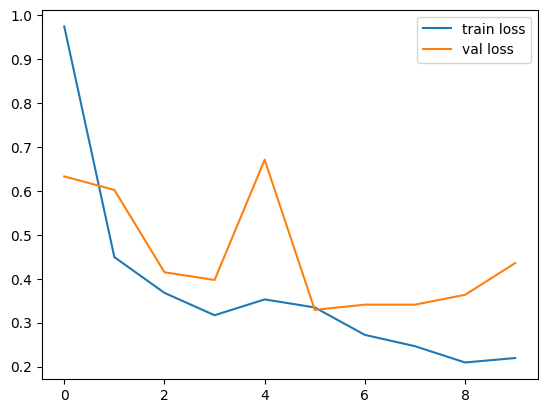

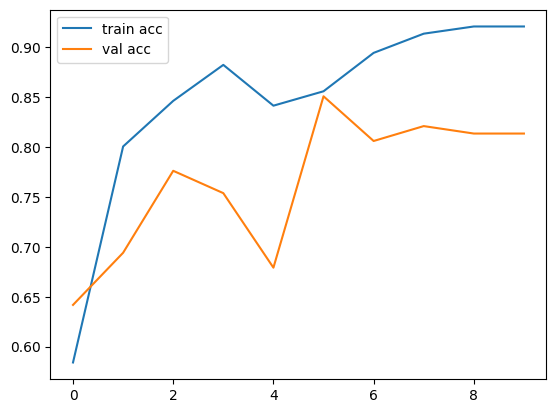

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [16]:
y_pred = model.predict(test_dataset)

5/5 [==============================] - 25s 5s/step


In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0], dtype=int64)

Now predicting the image using the saved model

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model=load_model('model_vgg19.h5')

In [21]:
img=image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_90.png',
                   target_size=(224,224))

In [22]:
X = image.img_to_array(img)
X

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [23]:
X.shape

(224, 224, 3)

In [24]:
X = X/255

In [25]:
X

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [26]:
X=np.expand_dims(X,axis=0)
img_data=preprocess_input(X)
img_data.shape

(1, 224, 224, 3)

In [27]:
model.predict(img_data)

1/1 [==============================] - 0s 461ms/step


array([[3.2464502e-04, 9.9967539e-01]], dtype=float32)

In [28]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 221ms/step


In [29]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
